<a href="https://colab.research.google.com/github/TommasoAnnicchiarico/Python/blob/main/Apriori_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



  ## **Dataset**

</details>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Market_Basket_Optimisation.csv',header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



  ## **EDA**

</details>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


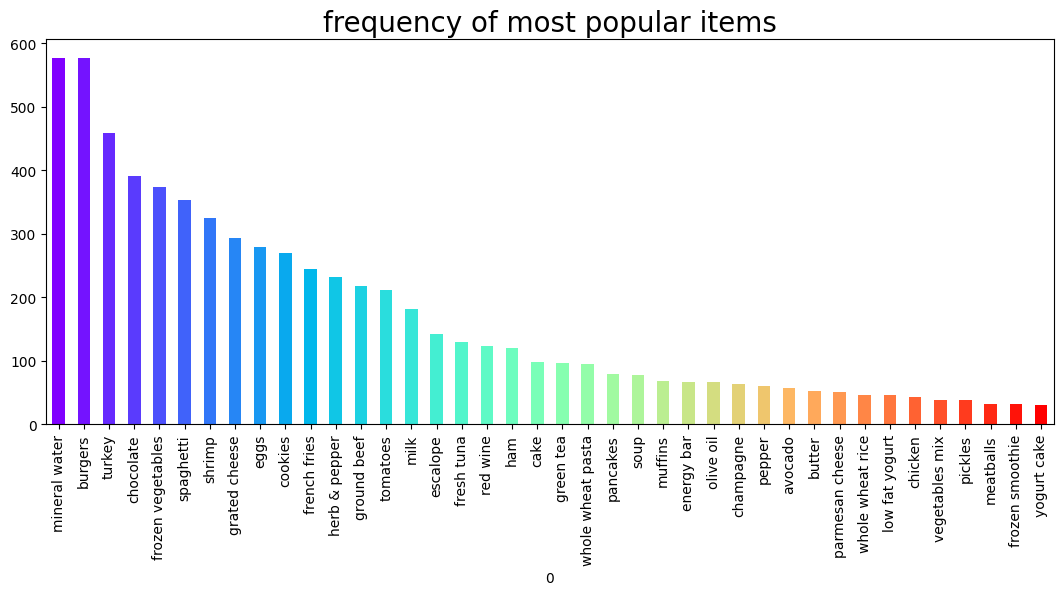

In [6]:
#plotting the most popular items
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid(False)
plt.show()

In [7]:
import networkx as nx
df['food'] = 'Food'
food = df.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

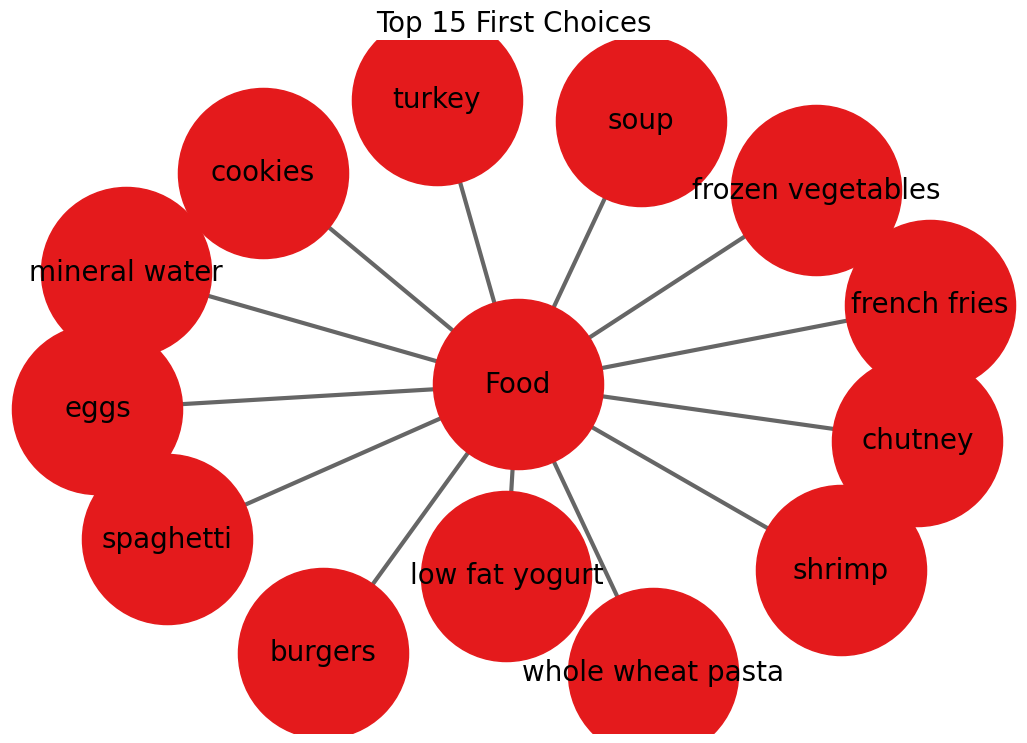

In [8]:
# import warnings
# warnings.filterwarnings('ignore')

#plotting the top 15 choices of customers

plt.rcParams['figure.figsize'] = (13, 9)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()


  ## **Market Basket Analysis Overview**

</details>

In [9]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(df.shape[0]):
  row = df.iloc[i].dropna().tolist()
  transactions.append(row)

In [10]:
transactions[:2]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil',
  'Food'],
 ['burgers', 'meatballs', 'eggs', 'Food']]

In [11]:
print('# of transactions: ', len(transactions))

# of transactions:  7501


**Building the model**

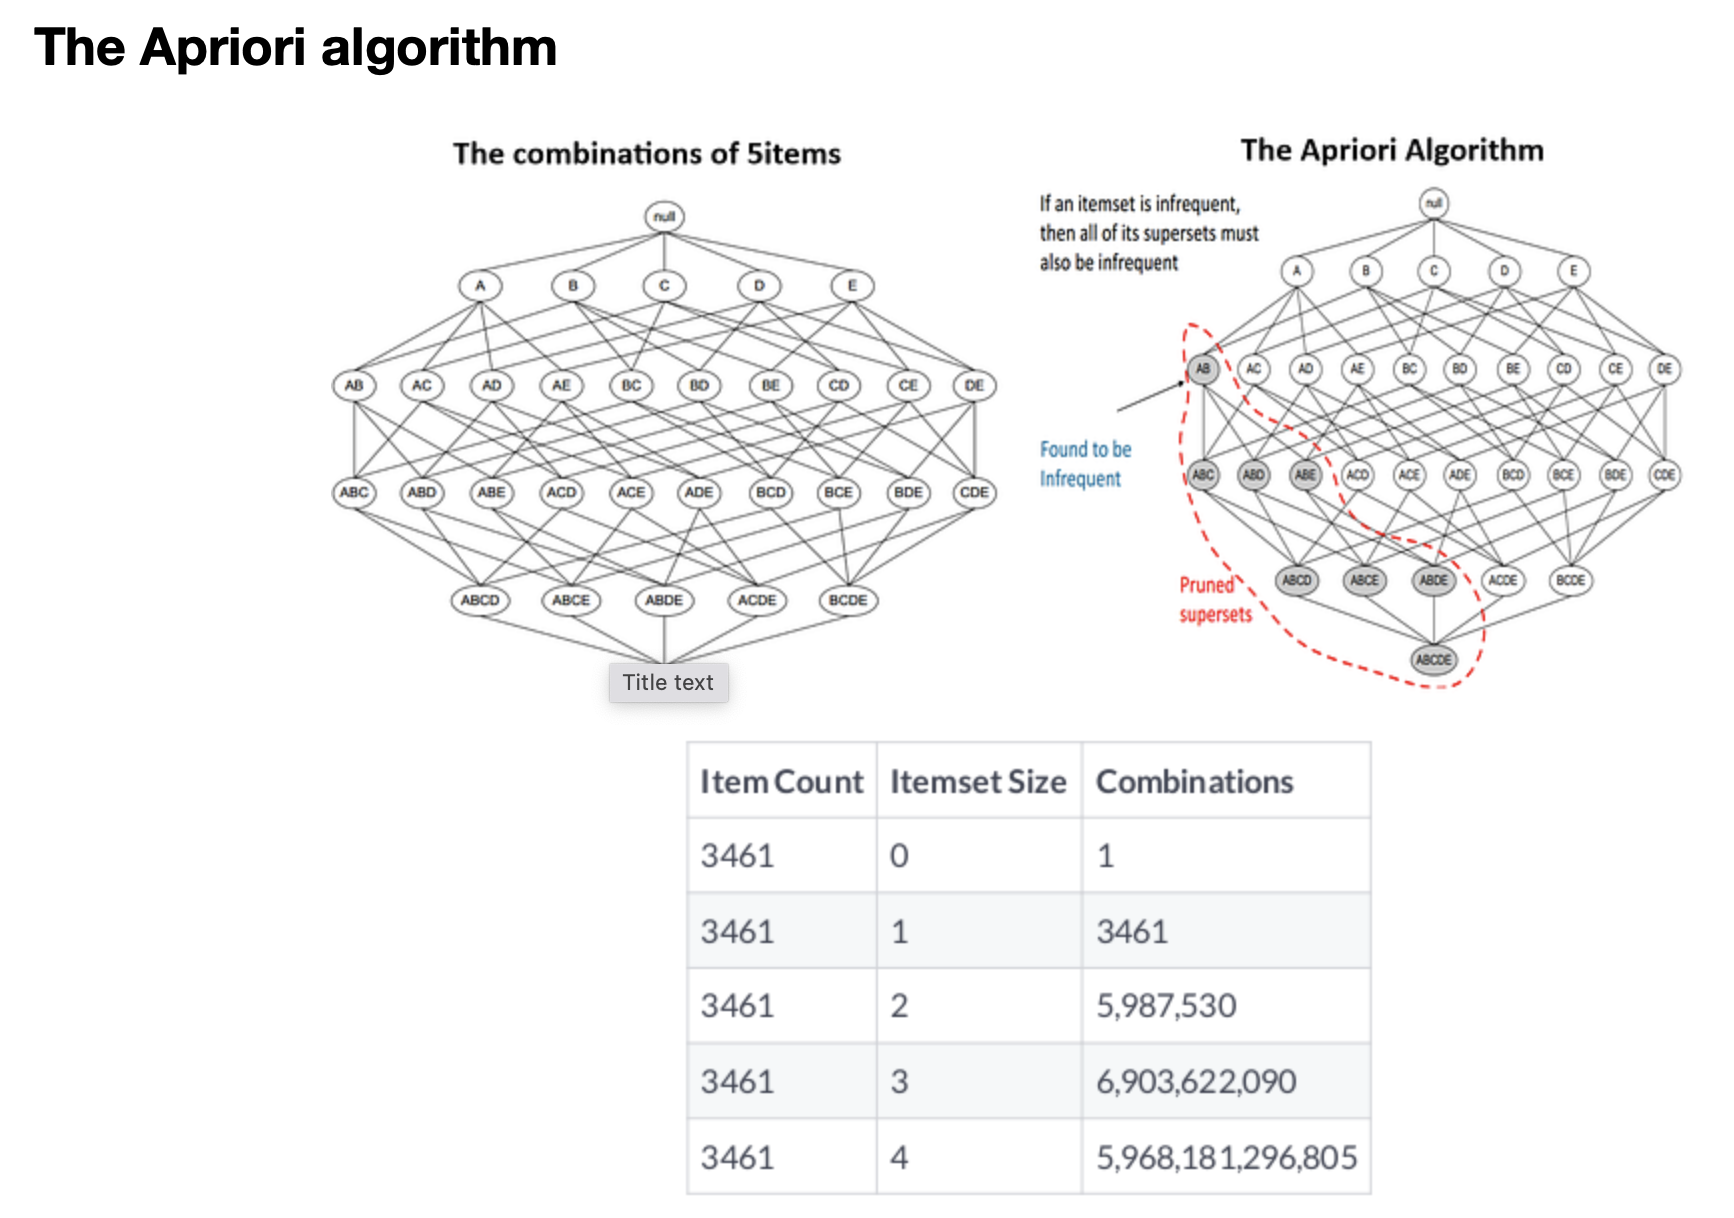

In [22]:
# !pip install apyori
from apyori import apriori

association_rules = apriori(transactions=transactions,
                min_support=0.004, # how frequent is your item(s) in the dataset
                min_confidence=0.4, # how often your rule will work
                min_lift=3, # how better off you are compared to pure randomness
                min_length=0,
                max_length=3)
association_results = list(association_rules)

In [23]:
#cleaning model's output
def inspect(association_results):
    item_sets = []
    supports    = []
    lhs         = []
    rhs         = []
    confidences = []
    lifts       = []
    lhs_supports = []
    rhs_supports = []

    # Calculate supports for individual items
    item_supports = {}
    for transaction in transactions:
        for item in transaction:
            if item not in item_supports:
                item_supports[item] = 0
            item_supports[item] += 1

    for result in association_results:
        for subset in result[2]:
            item_sets.append(tuple(result[0]))
            supports.append(result[1])
            lhs_item = tuple(subset[0])[0] # Assuming lhs is a single item
            rhs_item = tuple(subset[1])[0] # Assuming rhs is a single item
            lhs.append((lhs_item,))
            rhs.append((rhs_item,))
            confidences.append(subset[2])
            lifts.append(subset[3])
            lhs_supports.append(item_supports[lhs_item] / len(transactions))
            rhs_supports.append(item_supports[rhs_item] / len(transactions))

    return list(zip(item_sets, lhs, rhs, supports, confidences, lifts, lhs_supports, rhs_supports))

results_df = pd.DataFrame(inspect(association_results),
                          columns = ['Item Set', 'Left Hand Side', 'Right Hand Side',
                                     'Support', 'Confidence', 'Lift', 'Antecedent Support', 'Consequent Support'])

In [24]:
# Reordering the columns for better visualization
association_results_df = results_df[['Item Set', 'Left Hand Side', 'Right Hand Side', 'Support',
                         'Antecedent Support', 'Consequent Support', 'Confidence', 'Lift']]

In [25]:
print(len(association_results_df))

4



  ## **Interpret the results**

</details>

In [26]:
association_results_df.sort_values(by='Lift', ascending=False)

,Item Set,Left Hand Side,Right Hand Side,Support,Antecedent Support,Consequent Support,Confidence,Lift
3,"(spaghetti, tomatoes, olive oil)","(tomatoes,)","(spaghetti,)",0.004399,0.068391,0.174110,0.611111,3.509912
0,"(spaghetti, cooking oil, ground beef)","(cooking oil,)","(spaghetti,)",0.004799,0.051060,0.174110,0.571429,3.281995
1,"(olive oil, frozen vegetables, milk)","(frozen vegetables,)","(milk,)",0.004799,0.095321,0.129583,0.423529,3.268410
2,"(shrimp, spaghetti, ground beef)","(shrimp,)","(spaghetti,)",0.005999,0.071457,0.174110,0.523256,3.005315


**The support metric**

Support measures the share of transactions that contain an itemset.

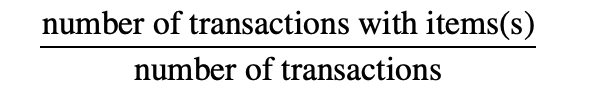



**The confidence metric**

Can improve over support with additional metrics.
Adding confidence provides a more complete picture.
Confidence gives us the probability we will purchase  𝑌  given we have purchased  𝑋 .

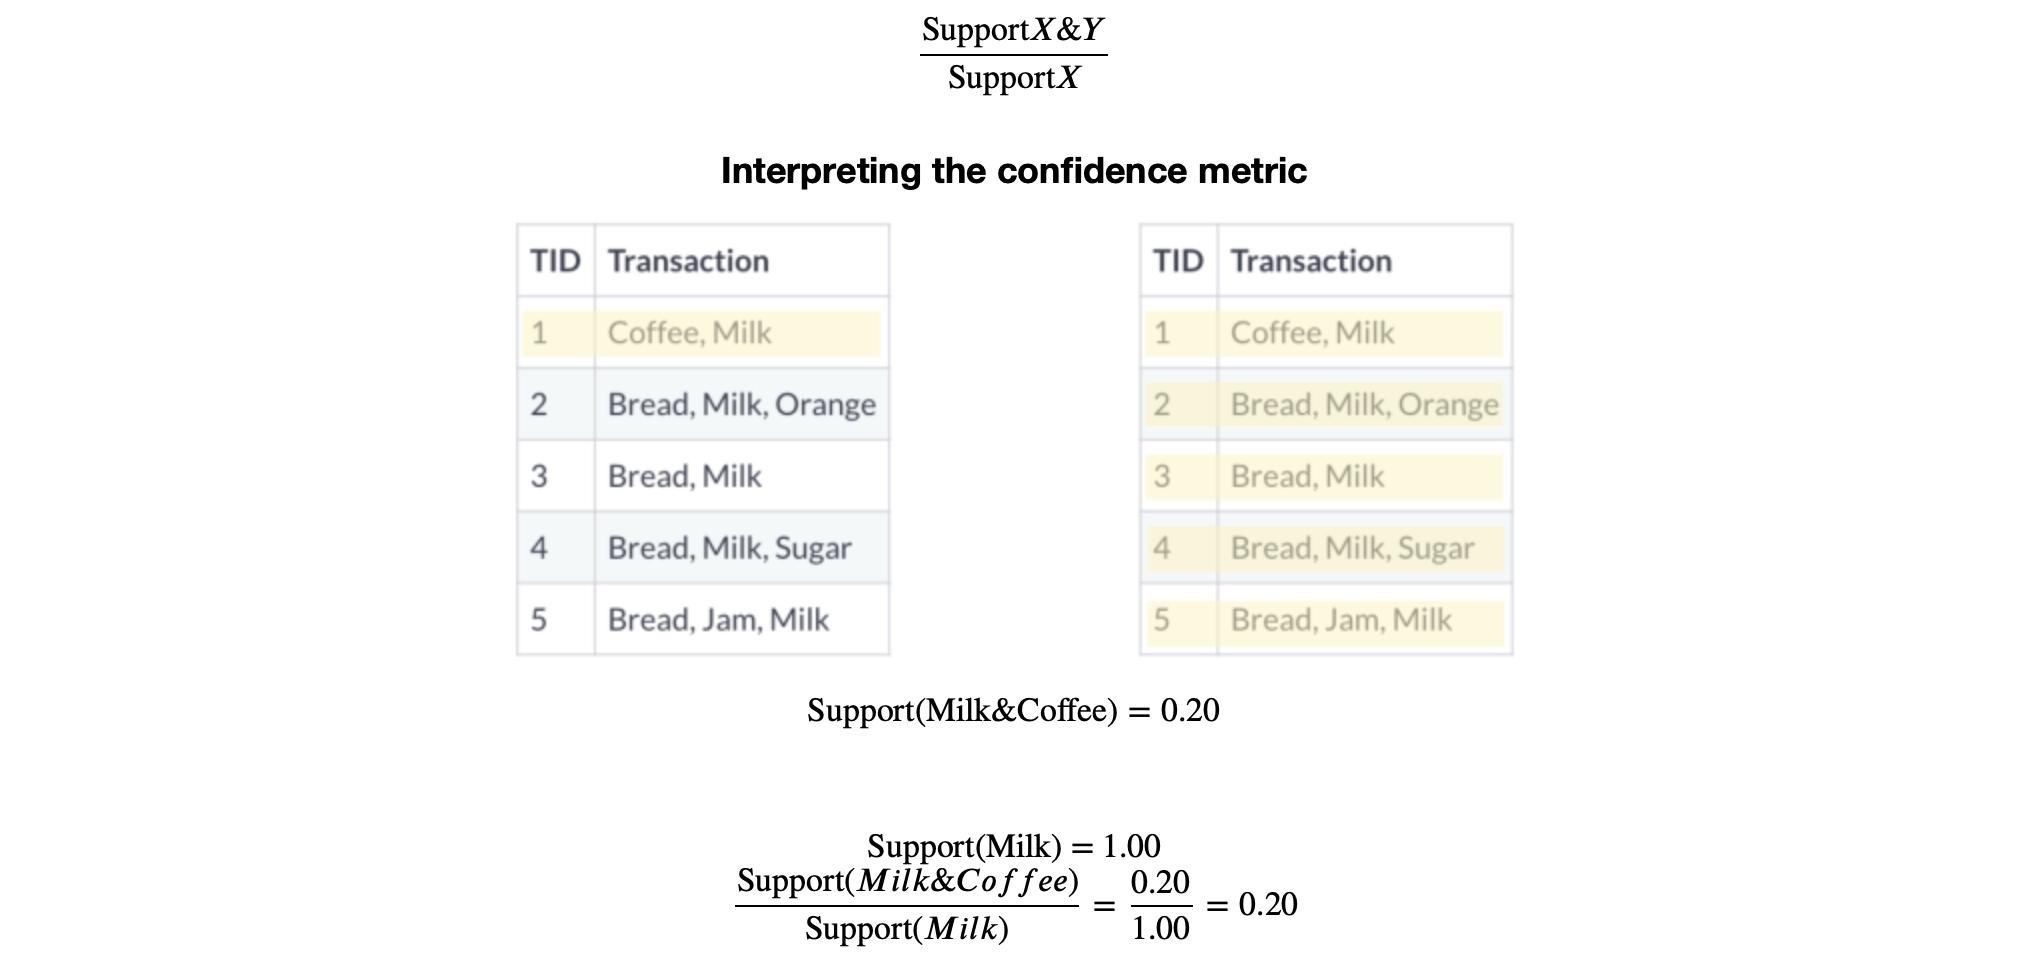


The probability of purchasing both milk and coffee does not change if we condition on purchasing milk. Purchasing milk tells us nothing about purchasing coffee.

**The lift metric**

Lift provides another metric for evaluating the relationship between items.


*   Numerator: Proportion of transactions that contain  𝑋  and  𝑌 .
*   Denominator: Proportion if  𝑋  and  𝑌  are assigned randomly and independently to transactions.

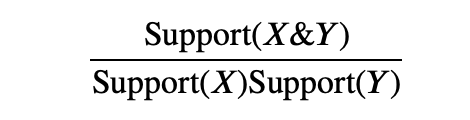

*   Lift  >1  tells us  2  items occur in transactions together more often than we would expect based on their individual support values. This means the relationship is unlikely to be explained by random chance. This natural threshold is convenient for filtering purposes.
*   Lift  < 1  tells us  2  items are paired together less frequently in transactions than we would expect if the pairings occurred by random chance.
